# **Machine Learning App in R**

## **Brian J. Ault**

### **Load The Data**

In [11]:
library(caret)

In [12]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

### **Create a Validation Dataset**

In [13]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

Warning message in createDataPartition(dataset$Species, p = 0.8, list = FALSE):
“Some classes have a single record ( name ) and these will be selected for the sample”


### **Summarize Dataset**

In [29]:
# dimensions of dataset
dim(dataset)

[1] 3 1

In [30]:
# list types for each attribute
sapply(dataset, class)

Species 
"factor"

In [31]:
# take a peek at the first 5 rows of the data
head(dataset)

,Species
,<fct>
1,setosa
2,versicolor
3,virginica


In [32]:
# Example data with an unwanted level 'name'
dataset <- data.frame(
  Species = factor(c("setosa", "versicolor", "virginica"))
)
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [33]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,1,33.33333
versicolor,1,33.33333
virginica,1,33.33333


In [34]:
# summarize attribute distributions
summary(dataset)

       Species 
 setosa    :1  
 versicolor:1  
 virginica :1  

### **Visualize Dataset**

In [35]:
# Check dataset structure
str(dataset)

# Split input (x) and output (y)
x <- dataset[, 1:4]  # Selecting columns 1 to 4 as predictors
y <- dataset[, 5]    # Selecting column 5 as the response variable

# Check x and y
head(x)  # Display first few rows of x
head(y)  # Display first few elements of y

'data.frame':	3 obs. of  1 variable:
 $ Species: Factor w/ 3 levels "setosa","versicolor",..: 1 2 3


ERROR: Error in `[.data.frame`(dataset, , 1:4): undefined columns selected


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


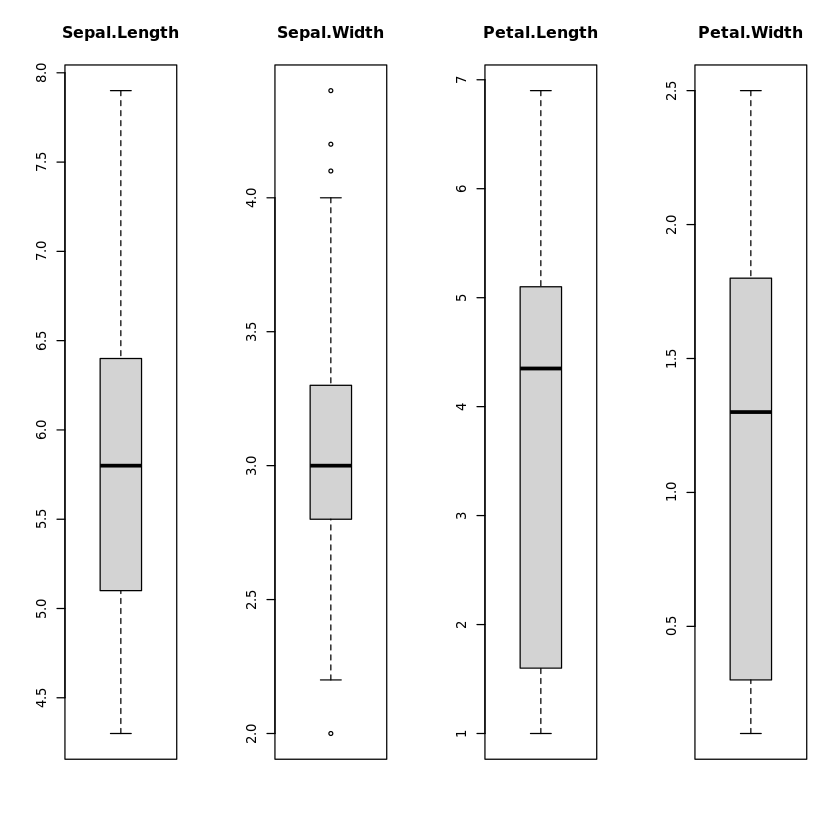

In [36]:
# Ensure 'iris' dataset is loaded and check its structure
str(iris)

# Plot boxplots for each numeric attribute
par(mfrow = c(1, 4))  # Set up plotting layout

# Loop through numeric columns (1 to 4) in iris dataset
for (i in 1:4) {
  boxplot(iris[[i]], main = names(iris)[i])  # Plot boxplot for each column
}

[1] TRUE

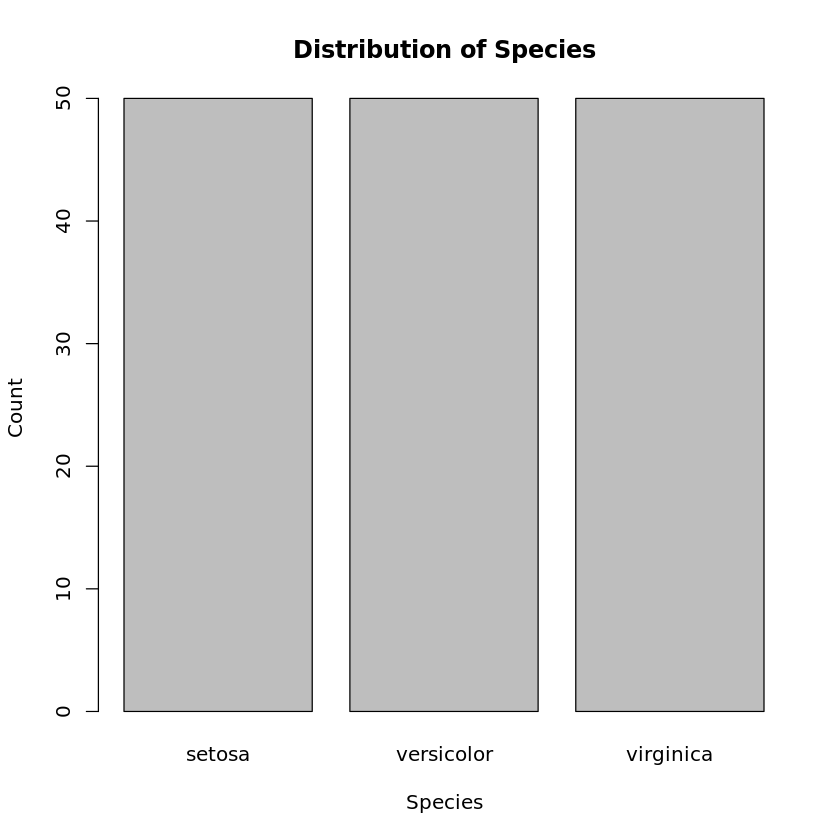

In [37]:
# Load the iris dataset (built-in dataset in R)
data(iris)

# Split input (x) and output (y)
x <- iris[, 1:4]  # Selecting columns 1 to 4 as predictors
y <- iris[, 5]    # Selecting column 5 (Species) as the response variable

# Check if y exists
exists("y")

# Plotting y (bar plot for categorical variable y)
if (exists("y")) {
  barplot(table(y), main = "Distribution of Species", xlab = "Species", ylab = "Count")
} else {
  print("Variable 'y' does not exist or is not correctly defined.")
}

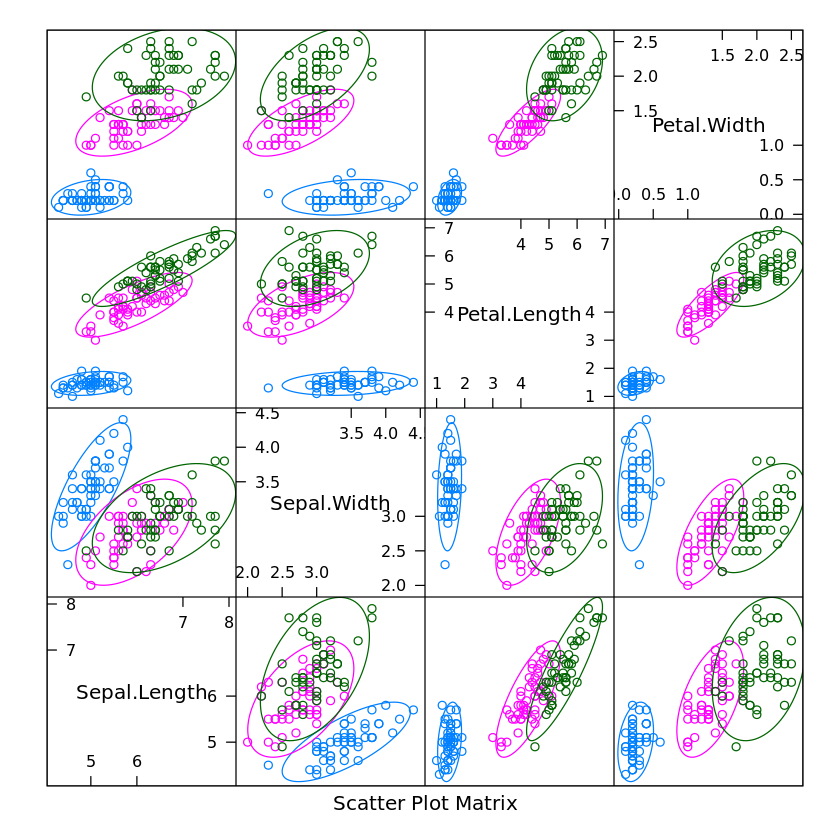

In [38]:
# Load necessary library and data (if not already loaded)
library(caret)
data(iris)

# Subset relevant columns from iris dataset
x <- iris[, 1:4]  # Assuming first 4 columns are numeric predictors
y <- iris$Species  # Species column as the response variable (factor)

# Ensure y is a factor (class labels)
y <- as.factor(y)

# Check for and handle missing values if necessary
if (anyNA(x)) {
  x <- na.omit(x)
  y <- y[complete.cases(x)]
}

# Generate scatterplot matrix with ellipses using featurePlot
featurePlot(x = x, y = y, plot = "ellipse")

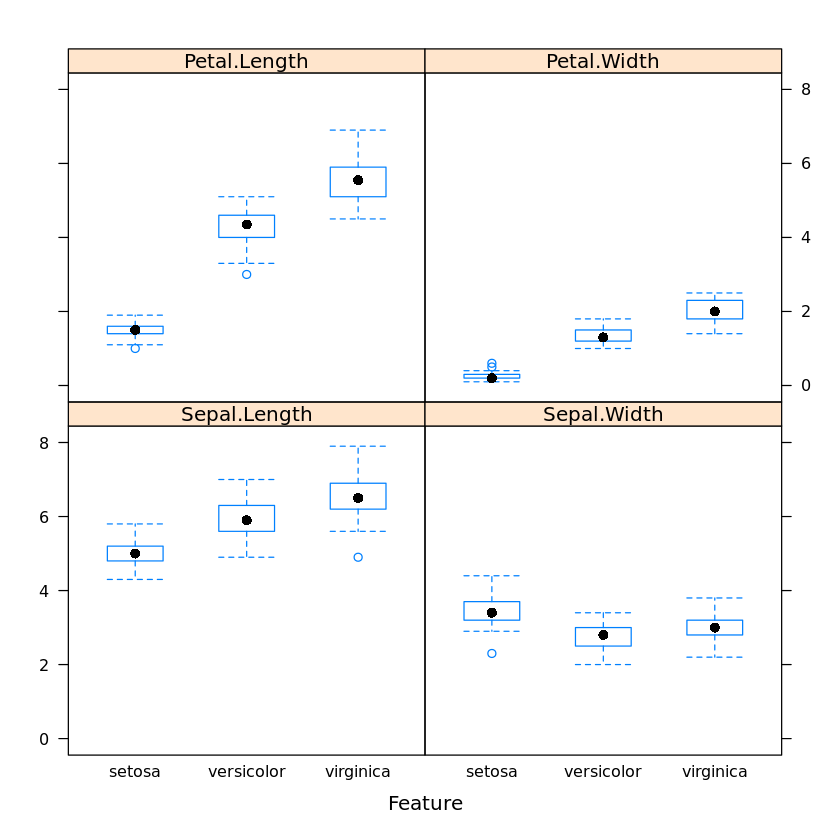

In [39]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

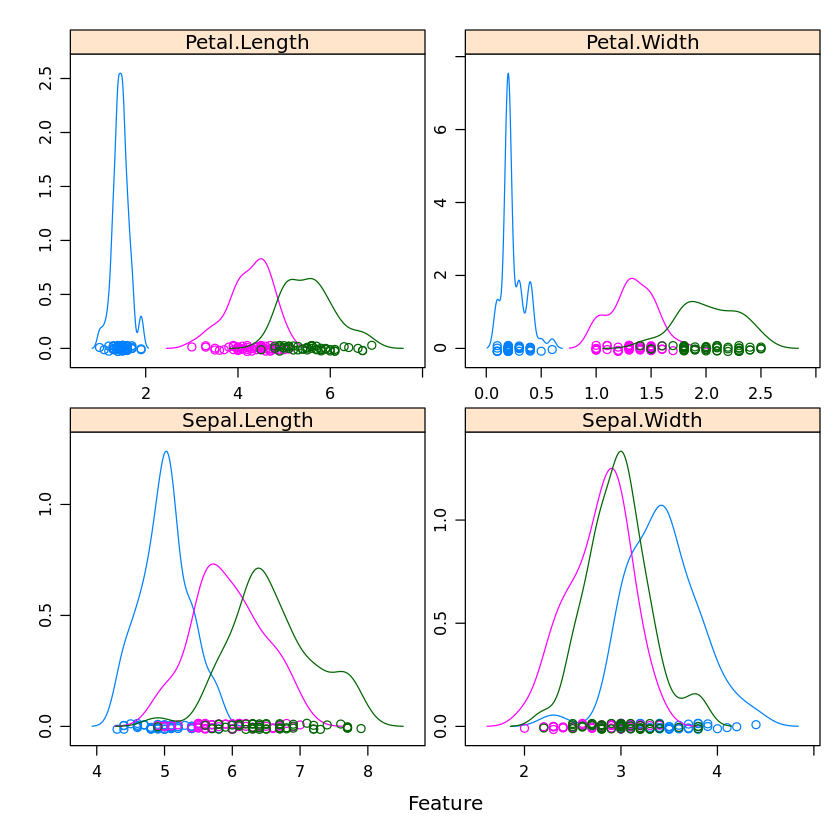

In [40]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

### **Evaluate Some Algorithms**

In [44]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [47]:
# Load necessary libraries
library(caret)

# Assuming dataset is your actual dataset with appropriate column names
# Check column names
colnames(dataset)

# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

[1] "Species"

ERROR: Error: Please use column names for `x`
